<a href="https://colab.research.google.com/github/2000KruthiR/DETECTING-FAKE-NEWS/blob/main/Detecting_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fake new detection overview Steps
#### 1- Import necessary libraries
#### 2- Read and explore the dataset
#### 3- Build a model using PassiveAggressiveClassifier
#### 4- Evaluate the model's accuracy

In [ ]:
pip install numpy pandas sklearn


## Step 1: Data Exploration

1. Import necessary libraries.
2. Load the dataset.
3. Display the first few rows, dataset information, shape, and label distribution.
4. Visualize the label distribution and inspect some text data examples.

#### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

#### Read and explore the dataset

In [3]:
news= pd.read_csv("/content/news.csv")

In [4]:
# Displaying the first 10 rows of the dataset to understand its structure
print("First 10 rows of the dataset:")
print(news.head(10))

First 10 rows of the dataset:
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Ker

In [5]:
# Displaying the dataset information to understand data types and missing values
print("\nDataset Information:")
print(news.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [6]:
# Displaying the shape of the dataset to know the number of rows and columns
print("\nDataset Shape:")
print(news.shape)


Dataset Shape:
(6335, 4)


In [7]:
# Displaying the value counts of the labels to understand the distribution of fake and real news
print("\nLabel Distribution:")
print(news["label"].value_counts())


Label Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [8]:
labels= news.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

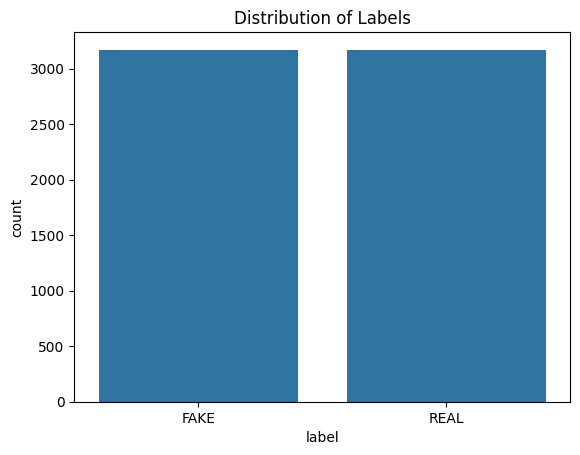

In [10]:
# Visualizing the label distribution
sns.countplot(x='label', data=news)
plt.title('Distribution of Labels')
plt.show()

In [11]:
# Displaying some text data
print("\nSample Text Data:")
for i in range(3):
    print(f"Title: {news['title'][i]}")
    print(f"Text: {news['text'][i][:300]}...")  # Limiting the text display for readability
    print(f"Label: {news['label'][i]}")
    print()


Sample Text Data:
Title: You Can Smell Hillary’s Fear
Text: Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to ...
Label: FAKE

Title: Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)
Text: Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr 
There are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. 
In a particularly staggering example of political cowardice, Paul Rya...
Label: FAKE

Title: Kerry to go to Paris in gesture of sympathy
Text: U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended 

## Step 2: Data Preprocessing and Model Building

1. Handle missing values.
2. Split the dataset into training and testing sets.
3. Vectorize the text data using TfidfVectorizer.
4. Build and train a PassiveAggressiveClassifier model.

#### Build the model

In [12]:
# Checking the missing values
print("\nMissing Values:")
print(news.isnull().sum())


Missing Values:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [13]:
# Droping rows with missing values
news.dropna(inplace=True)

In [14]:
# Spliting the dataset into training and testing sets
# 40% of the data will be used for testing and 60% for training
x_train, x_test, y_train, y_test = train_test_split(news["text"], labels, test_size=0.4, random_state=7)

In [15]:
# Initialize TfidfVectorizer with English stop words
# TfidfVectorizer converts text data to numerical data suitable for machine learning algorithms
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [16]:
# Fit and transform the training data, and transform the testing data
# This means we learn the vocabulary and document frequencies from the training set
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [17]:
# Create a PassiveAggressiveClassifier
# PassiveAggressiveClassifier is suitable for large-scale learning and is efficient for text classification
passive = PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [18]:
# Predicting the test set results
y_pred = passive.predict(tfidf_test)

## Step 3: Model Evaluation

1.    Generate a confusion matrix.
2.  Visualize the confusion matrix using a heatmap.
3.    Calculate the model's accuracy.
4.    Generate a classification report.
5.   Display additional evaluation metrics.
6.    Visualize the ROC curve.

#### Evaluate the model's accuracy

In [19]:
# Create a confusion matrix to evaluate the model's performance
# Confusion matrix helps in understanding the performance of the classification model
matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print("\nConfusion Matrix:")
print(matrix)


Confusion Matrix:
[[1183   87]
 [  86 1178]]


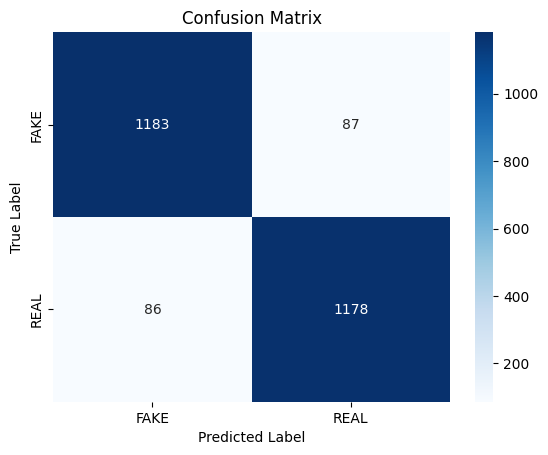

In [20]:
# Visualize the confusion matrix using a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 93.17%


#### The model's accuracy is 93%

In [22]:
# Generate a classification report
# Classification report provides precision, recall, f1-score, and support for the model
report = classification_report(y_test, y_pred, target_names=['FAKE', 'REAL'])
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [23]:
print("\nAdditional Evaluation Metrics:")
tn, fp, fn, tp = matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


Additional Evaluation Metrics:
True Negatives: 1183
False Positives: 87
False Negatives: 86
True Positives: 1178


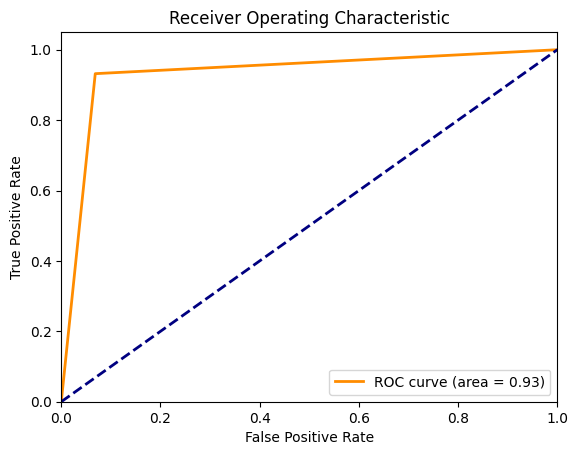

In [24]:
# Visualize ROC Curve
from sklearn.metrics import roc_curve, auc

y_test_binary = [1 if label == 'REAL' else 0 for label in y_test]
y_pred_binary = [1 if label == 'REAL' else 0 for label in y_pred]
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()